In [81]:
import os
import pandas as pd
%matplotlib inline

In [82]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [83]:
# Read your api key environment variable
api_key = os.getenv("news_api")
len(api_key)

32

In [4]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [40]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin AND Bitcoin AND BTC ",
    language="en",
    page_size=50,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about bitcoin: 3881


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Romain Dillet',
 'title': 'Bitcoin is also having a very, very bad day',
 'description': 'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month — including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes. On CoinGecko, 1 BTC was worth around $7,250 across…',
 'url': 'http://techcrunch.com/2020/03/12/bitcoin-is-also-having-a-very-very-bad-day/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2019/04/bitcoin-bitfinex.jpg?w=750',
 'publishedAt': '2020-03-12T12:34:45Z',
 'content': 'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes.\r\nOn CoinGecko, 1 BTC was worth around $7,250 across … [+1146 chars]'}

In [41]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum AND Ethereum AND ETH",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about enthereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about enthereum: 1189


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Romain Dillet',
 'title': 'Bitcoin is also having a very, very bad day',
 'description': 'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month — including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes. On CoinGecko, 1 BTC was worth around $7,250 across…',
 'url': 'http://techcrunch.com/2020/03/12/bitcoin-is-also-having-a-very-very-bad-day/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2019/04/bitcoin-bitfinex.jpg?w=750',
 'publishedAt': '2020-03-12T12:34:45Z',
 'content': 'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes.\r\nOn CoinGecko, 1 BTC was worth around $7,250 across … [+1146 chars]'}

In [42]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2020-03-12T12:34:45Z,Bitcoin is going through a remarkably bad day....,-0.2944,0.074,0.078,0.847
1,2020-03-04T13:00:00Z,After launching two cryptocurrency-oriented sm...,0.0000,0.000,0.000,1.000
2,2020-03-12T11:31:23Z,Our robot colleague Satoshi Nakaboto writes ab...,0.2430,0.071,0.052,0.877
3,2020-02-20T19:18:20Z,If youve been following cryptocurrency news fo...,0.0000,0.000,0.000,1.000
4,2020-03-04T06:19:08Z,Indias Supreme Court on Wednesday overturned c...,-0.5106,0.103,0.168,0.730


In [43]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2020-03-12,Bitcoin is going through a remarkably bad day....,-0.2944,0.074,0.078,0.847
1,2020-03-06,If a player picks up an item in an online vide...,0.0000,0.000,0.000,1.000
2,2020-02-20,If youve been following cryptocurrency news fo...,0.0000,0.000,0.000,1.000
3,2020-03-17,"Coinbase Card, the Visa debit card that lets y...",-0.1027,0.000,0.035,0.965
4,2020-02-27,When it comes to celebrities shilling shady in...,0.3182,0.112,0.066,0.822


In [44]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,46.000000,46.000000,46.000000,46.000000
mean,0.237809,0.074130,0.036717,0.889196
std,0.447190,0.048793,0.049377,0.063025
min,-0.802000,0.000000,0.000000,0.730000
25%,0.000000,0.050250,0.000000,0.852500
50%,0.370700,0.067500,0.000000,0.899000
75%,0.507000,0.098500,0.061750,0.932000
max,0.862500,0.209000,0.168000,1.000000


In [45]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,97.000000,97.000000,97.000000,97.000000
mean,0.204547,0.067495,0.028753,0.903763
std,0.428832,0.061357,0.043163,0.063767
min,-0.802000,0.000000,0.000000,0.757000
25%,0.000000,0.000000,0.000000,0.849000
50%,0.318200,0.065000,0.000000,0.913000
75%,0.493900,0.108000,0.050000,0.948000
max,0.895500,0.218000,0.177000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin.

Q: Which coin had the highest compound score?

A: Bitcoin.

Q. Which coin had the highest positive score?

A: Ethereum.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [21]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [77]:
# Expand the default stopwords list if necessary
sw_addon = {'going', 'youve'}

In [78]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""

    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # tokenization
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Remove the stop words
    # Convert the words to lowercase
    sw = set(stopwords.words('english'))
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]

    return tokens

In [79]:
# Create a new tokens column for bitcoin
bitcoin_df['tokens']=[tokenizer(word) for word in bitcoin_df['text']]
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-03-12T12:34:45Z,Bitcoin is going through a remarkably bad day....,-0.2944,0.074,0.078,0.847,"[bitcoin, remarkably, bad, day, turn, asset, r..."
1,2020-03-04T13:00:00Z,After launching two cryptocurrency-oriented sm...,0.0000,0.000,0.000,1.000,"[launching, two, cryptocurrencyoriented, smart..."
2,2020-03-12T11:31:23Z,Our robot colleague Satoshi Nakaboto writes ab...,0.2430,0.071,0.052,0.877,"[robot, colleague, satoshi, nakaboto, writes, ..."
3,2020-02-20T19:18:20Z,If youve been following cryptocurrency news fo...,0.0000,0.000,0.000,1.000,"[following, cryptocurrency, news, past, month,..."
4,2020-03-04T06:19:08Z,Indias Supreme Court on Wednesday overturned c...,-0.5106,0.103,0.168,0.730,"[indias, supreme, court, wednesday, overturned..."


In [80]:
# Create a new tokens column for ethereum
ethereum_df['tokens']=[tokenizer(word) for word in ethereum_df['text']]
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-03-12,Bitcoin is going through a remarkably bad day....,-0.2944,0.074,0.078,0.847,"[bitcoin, remarkably, bad, day, turn, asset, r..."
1,2020-03-06,If a player picks up an item in an online vide...,0.0000,0.000,0.000,1.000,"[player, pick, item, online, video, game, owns..."
2,2020-02-20,If youve been following cryptocurrency news fo...,0.0000,0.000,0.000,1.000,"[following, cryptocurrency, news, past, month,..."
3,2020-03-17,"Coinbase Card, the Visa debit card that lets y...",-0.1027,0.000,0.035,0.965,"[coinbase, card, visa, debit, card, let, spend..."
4,2020-02-27,When it comes to celebrities shilling shady in...,0.3182,0.112,0.066,0.822,"[come, celebrity, shilling, shady, initial, co..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [90]:
from collections import Counter
from nltk import ngrams

In [84]:
bitcoin_df['text']

0     Bitcoin is going through a remarkably bad day....
1     After launching two cryptocurrency-oriented sm...
2     Our robot colleague Satoshi Nakaboto writes ab...
3     If youve been following cryptocurrency news fo...
4     Indias Supreme Court on Wednesday overturned c...
5     Our robot colleague Satoshi Nakaboto writes ab...
6     For those unfamiliar with the term, a “Bitcoin...
7     Our robot colleague Satoshi Nakaboto writes ab...
8     Our robot colleague Satoshi Nakaboto writes ab...
9     Our robot colleague Satoshi Nakaboto writes ab...
10    Our robot colleague Satoshi Nakaboto writes ab...
11    Our robot colleague Satoshi Nakaboto writes ab...
12    Our robot colleague Satoshi Nakaboto writes ab...
13    Our robot colleague Satoshi Nakaboto writes ab...
14    Our robot colleague Satoshi Nakaboto writes ab...
15    Our robot colleague Satoshi Nakaboto writes ab...
16    Our robot colleague Satoshi Nakaboto writes ab...
17    Our robot colleague Satoshi Nakaboto write

In [112]:
# Generate the Bitcoin N-grams where N=2
bitcoin_text_all = []
for token in bitcoin_df['tokens']:
    for text in token:
        bitcoin_text_all.append(text)
bitcoin_bigram_counts = Counter(ngrams(bitcoin_text_all, n=2))
bitcoin_bigram_counts.most_common(10)

[(('satoshi', 'nakaboto'), 32),
 (('char', 'robot'), 16),
 (('robot', 'colleague'), 16),
 (('colleague', 'satoshi'), 16),
 (('nakaboto', 'writes'), 16),
 (('writes', 'bitcoin'), 16),
 (('bitcoin', 'btc'), 16),
 (('every', 'fucking'), 16),
 (('fucking', 'daywelcome'), 16),
 (('daywelcome', 'another'), 16)]

In [114]:
# Generate the Ethereum N-grams where N=2
ethereum_text_all = []
for token in ethereum_df['tokens']:
    for text in token:
        ethereum_text_all.append(text)
ethereum_bigram_counts = Counter(ngrams(ethereum_text_all, n=2))
ethereum_bigram_counts.most_common(10)

[(('decentralized', 'finance'), 8),
 (('char', 'ethereum'), 8),
 (('ether', 'eth'), 7),
 (('finance', 'defi'), 6),
 (('vitalik', 'buterin'), 5),
 (('first', 'time'), 4),
 (('ethereum', 'network'), 4),
 (('char', 'bitcoin'), 4),
 (('united', 'nations'), 4),
 (('char', 'eoseos'), 4)]

In [129]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [130]:
# Get the top 10 words for Bitcoin
token_count(bitcoin_text_all)

[('bitcoin', 60),
 ('char', 46),
 ('satoshi', 32),
 ('nakaboto', 32),
 ('btc', 19),
 ('today', 19),
 ('hour', 18),
 ('robot', 18),
 ('another', 17),
 ('past', 17)]

In [131]:
# Get the top 10 words for Ethereum
token_count(ethereum_text_all)

[('char', 97),
 ('ethereum', 38),
 ('bitcoin', 27),
 ('cryptocurrency', 20),
 ('ha', 20),
 ('blockchain', 20),
 ('eth', 18),
 ('first', 17),
 ('new', 16),
 ('company', 14)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [132]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [133]:
def listToString(s):    
    # initialize an empty string 
    str1 = " " 
    # return string   
    return (str1.join(s))

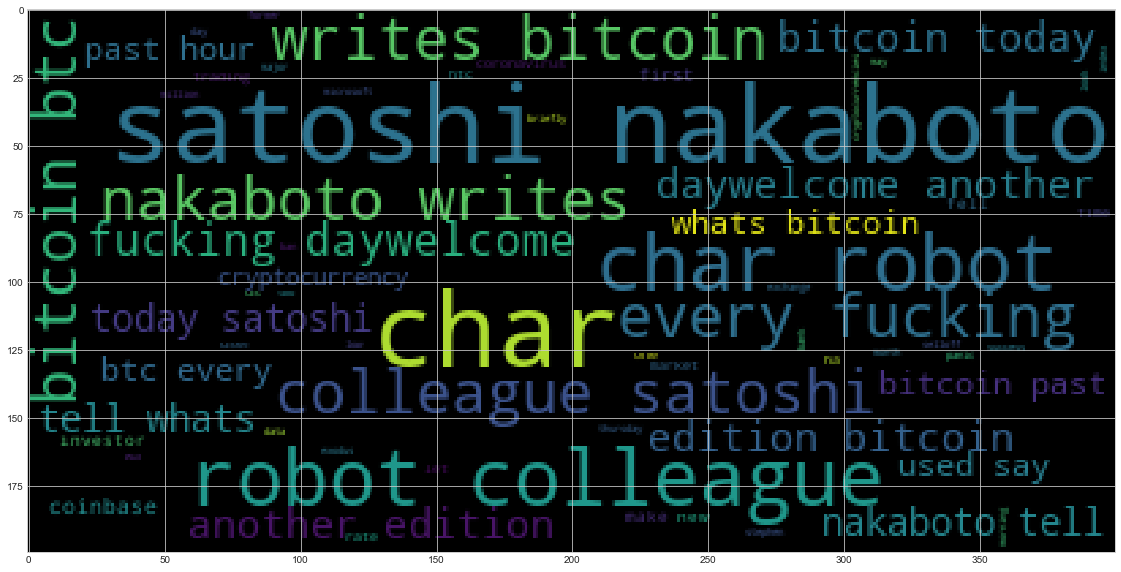

In [134]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(listToString(bitcoin_text_all))
plt.imshow(wc)

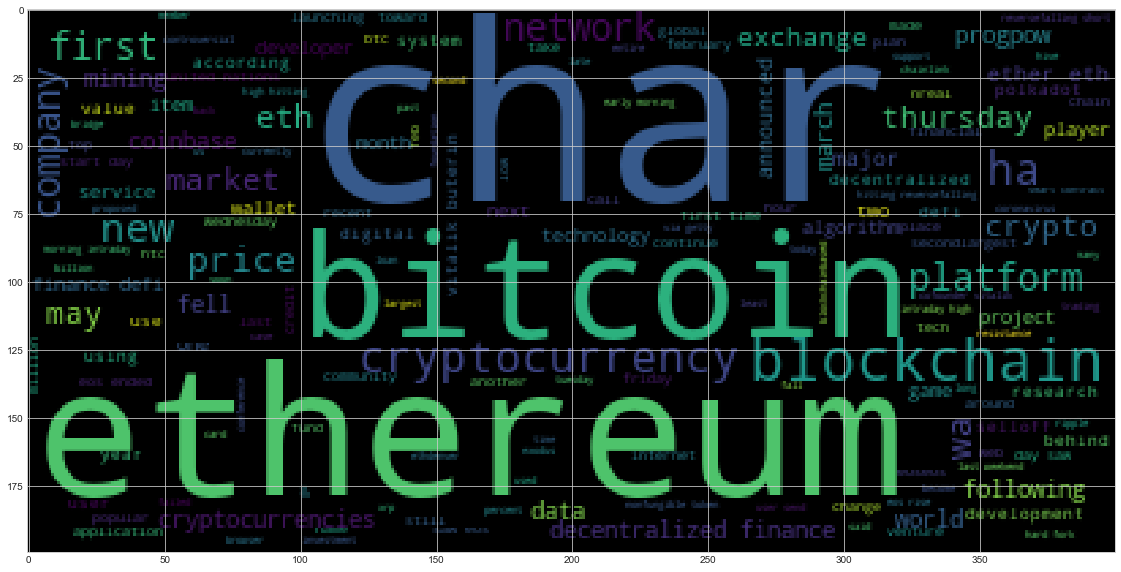

In [135]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(listToString(ethereum_text_all))
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [136]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [137]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [140]:
# Concatenate all of the bitcoin text together
bitcoin_big_string = listToString(bitcoin_df['text'])

In [155]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_big_string)
# Add a title to the document
bitcoin_doc.user_data['title'] = 'Bitcoin NER'

In [156]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [145]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text, ent.label_)

Bitcoin GPE
A couple of hours ago TIME
BTC ORG
15% PERCENT
just 20 minutes TIME
CoinGecko ORG
1 CARDINAL
around $7,250 MONEY
two CARDINAL
5 CARDINAL
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin BTC ORG
every fucking day DATE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Bentham PERSON
the past few months DATE
DeFi ORG
DeFi PERSON
Indias Supreme Court ORG
Wednesday DATE
two-year-old DATE
The Reserve Bank of India ORG
April 2018 DATE
Satoshi Nakaboto PERSON
Bitcoin BTC ORG
every fucking day DATE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Rousseau PERSON
BTC ORG
Satoshi Nakaboto PERSON
Bitcoin BTC ORG
every fucking day DATE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Plato PERSON
Success ORG
Satoshi Nakaboto PERSON
Bitcoin BTC ORG
every fucking day DATE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Hannah Arendt PERSON
Satoshi Nakaboto PERSON


---

## Ethereum NER

In [159]:
# Concatenate all of the bitcoin text together
ethereum_big_string = listToString(ethereum_df['text'])

In [160]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_big_string)
# Add a title to the document
ethereum_doc.user_data['title'] = 'Ethereum NER'

In [161]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [163]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text, ent.label_)

Bitcoin GPE
A couple of hours ago TIME
BTC ORG
15% PERCENT
just 20 minutes TIME
CoinGecko ORG
1 CARDINAL
around $7,250 MONEY
the past few months DATE
DeFi ORG
DeFi PERSON
Coinbase Card WORK_OF_ART
Visa ORG
Coinbase PERSON
Google ORG
Coinbase PRODUCT
first ORDINAL
the Securities and Exchange Commission ORG
Steven Seagal PERSON
Thursday DATE
SEC ORG
2018 DATE
The South Korean National Assembly ORG
today DATE
Orchid ORG
this past week DATE
2020 DATE
DApps &amp ORG
Thursday DATE
6,000 MONEY
first ORDINAL
May DATE
as low as $5,705.31 MONEY
Bloomberg PERSON
Thursday DATE
6,000 MONEY
first ORDINAL
May DATE
as low as $5,705.31 MONEY
Bloomberg PERSON
7 CARDINAL
7 CARDINAL
one-day DATE
months DATE
Bitcoin GPE
21 percent PERCENT
the last 24 hours TIME
Earlier today TIME
Bitcoin GPE
6,000 MONEY
first ORDINAL
Some Libra Association ORG
Andreessen Horowitz PERSON
Coinbase PERSON
today DATE
50 CARDINAL
The Celo Foundation’s ORG
Hundreds of thousands CARDINAL
last night TIME
Folding at Homea WORK_OF_A